In [63]:
import tweepy as tw
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import re

from collections import Counter
from google.colab import drive
drive.mount('/content/gdrive')
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [64]:
# from textblob import TextBlob
#c_key = input('Enter Consumer Key: ')
#c_secret = input('Enter Secret Key: ')
consumer_key = 'fP17sV7X4k3FgHW5ek1jGcxkt'
consumer_secret = 'w7LP9IcVdKnmrRm7ESKujq8QkHyR2s3oZptvzD7u0h7grOfPoA'
access_token = '1284744470039158784-gH1eHe5Mh1AbIDo8WgKWot73acCa1W'
access_token_secret = 'NPc0mbBeaE56nyVWHxG0D02VXa3jdOaQ7xjFCjzy4sPMp'

auth = tw.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_token,access_token_secret)
api = tw.API(auth)

In [65]:
df =pd.read_csv('gdrive/My Drive/CoronavirusTweets.CSV')
df.shape

(544735, 22)

In [66]:
df.columns

Index(['status_id', 'user_id', 'created_at', 'screen_name', 'text', 'source',
       'reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name',
       'is_quote', 'is_retweet', 'favourites_count', 'retweet_count',
       'country_code', 'place_full_name', 'place_type', 'followers_count',
       'friends_count', 'account_lang', 'account_created_at', 'verified',
       'lang'],
      dtype='object')

In [67]:
tweet = df.copy()
tweet.drop(['status_id','user_id','screen_name','source','reply_to_status_id',
            'reply_to_user_id','is_retweet','place_full_name','place_type',
            'reply_to_screen_name','is_quote','followers_count','friends_count','account_lang',
            'account_created_at','verified'],axis=1, inplace = True)
tweet.head()

,created_at,text,favourites_count,retweet_count,country_code,lang
0,2020-04-16T00:00:00Z,"Para complementar la higiene de tus manos, el ...",1828,2,NaN,es
1,2020-04-16T00:00:00Z,PWDs from Tahanang Walang Hagdan get aid amid ...,5449,1,NaN,tl
2,2020-04-16T00:00:00Z,#France ได้รับความทุกข์ทรมานจาก # ชุดการแยกตัว...,27,0,NaN,th
3,2020-04-16T00:00:00Z,Target ng Department of Health na magkaroon ng...,578,3,NaN,tl
4,2020-04-16T00:00:00Z,La @SSalud_mx lanzó una nueva convocatoria esp...,5743,0,NaN,es


In [68]:
tweet = tweet[tweet['lang'] == 'en']
tweet.head()

,created_at,text,favourites_count,retweet_count,country_code,lang
5,2020-04-16T00:00:00Z,G20 agrees to debt relief for poorest countrie...,1075,0,NaN,en
7,2020-04-16T00:00:00Z,B.C. health officials are urging people to kin...,501,0,NaN,en
9,2020-04-16T00:00:00Z,The Lovely Lisa Ann Joins The Show LIVE From N...,13891,0,NaN,en
10,2020-04-16T00:00:00Z,@allisonnamias @ArriolaLR As @ethanbdm referen...,327,0,NaN,en
11,2020-04-16T00:00:00Z,Study suggests higher rates of co-infection be...,1357,130,NaN,en


In [69]:
tweet.isna().sum()


tweet_list = list()

tweet_list.append(tweet['text'])
tweet_list

[5         G20 agrees to debt relief for poorest countrie...
 7         B.C. health officials are urging people to kin...
 9         The Lovely Lisa Ann Joins The Show LIVE From N...
 10        @allisonnamias @ArriolaLR As @ethanbdm referen...
 11        Study suggests higher rates of co-infection be...
                                 ...                        
 544726    @RealJamesWoods @RealJamesWoods can you blast ...
 544727    Today @Flowerdarby\n@cwolffeisenberg\nand @lis...
 544728    So proud of my team @PSLCt4ImmRights @PennStat...
 544733    As our national government is working to respo...
 544734    So, I figured if you have to wear a mask, it m...
 Name: text, Length: 298213, dtype: object]

In [70]:
#tweet.sort_values('favourites_count',ascending = False).head()
fav = tweet[['favourites_count','text']].sort_values('favourites_count',ascending = False)[:10].reset_index()
for i in range(10):
    print(i+1,'.', fav['text'][i],'\n')

1 . Ever since the #COVID19 epidemic began i think I've only taken 2 naps 😴 the whole time that's how much my anxiety has been bothering me it's so not fun at all!! 😢😭 

2 . Horrible what @FashionNova is doing to people during the #COVID19 epidemic especially trying to get people to spend their stimulus checks on them that's not right!! 😡😤 https://t.co/Y51WA03UYs 

3 . This is a wonderful story of surviving #COVID19 and of hope https://t.co/2fhFVPV8BV 

4 . Listen to the most recent episode of my podcast: Digital democracy as a consequence of the #Coronavirus crisis  https://t.co/116Y5G3UWK 

5 . retorica tanta ma poi...#covid19 #coronavirus Charter flights bring Eastern European workers to the UK and Germany after farms fail to r @AJEnglish https://t.co/9N2eWbildx https://t.co/59kDn8nvXU 

6 . #Covid19 BBC News - #Coronavirus: The unexpected items deemed 'essential'
https://t.co/0ZCLnTR0qk 

7 . Le mascherine sono in #Cina e difficili da avere #Covid19 #Coronavirus19  Virus Supplies B

In [71]:
for item in tweet_list:
    print(type(item))
#    analysis = TextBlob(item)
#    print(item,analysis.sentiment)

<class 'pandas.core.series.Series'>


In [72]:
search_query  = '#corona'
search_lang = 'en'
date_since = '2020-01-01'
api = tw.API(auth, wait_on_rate_limit=True)
#ublic_tweets = api.search('corona')

covidtweets = tw.Cursor(api.search,q = search_query,lang = search_lang,since = date_since).items(50)

f = open('Latest Twitter data.txt','a+',encoding="utf-8")

for item in covidtweets:
    f.write(item.text.lower())
    
print('Latest Tweets updated in file')

f.close()

Latest Tweets updated in file


In [73]:
for tweet in covidtweets:
  print(tweet.text)
  analysis = TextBlob(tweet.text)
  print(analysis.sentiment)

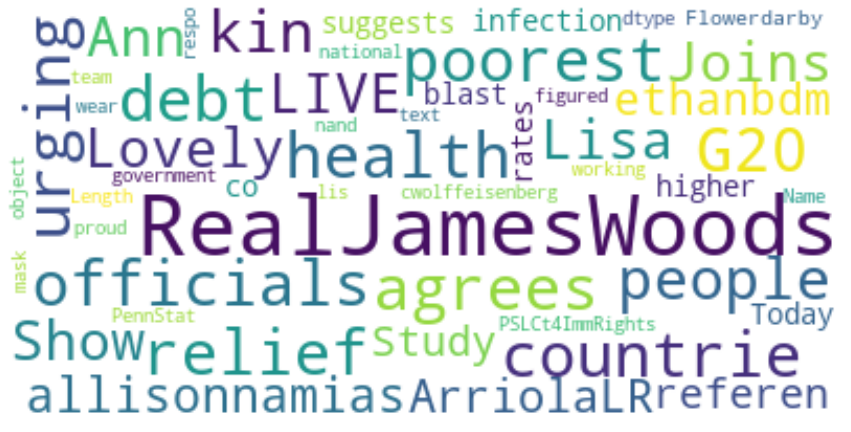

In [74]:
from wordcloud import WordCloud,STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data , title = None):
    wordcloud = WordCloud(background_color='white',stopwords=stopwords,max_words=200,max_font_size=40).generate(str(data))
  
    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    plt.title(title, size = 25)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

show_wordcloud(tweet['text'])

In [75]:
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+','',text)
    text = re.sub(r'#','',text)
    text = re.sub(r'RT','',text)
    
    return text
df['text'] = df['text'].apply(cleanTxt)

df['text']


0         Para complementar la higiene de tus manos, el ...
1         PWDs from Tahanang Walang Hagdan get aid amid ...
2         France ได้รับความทุกข์ทรมานจาก  ชุดการแยกตัวที...
3         Target ng Department of Health na magkaroon ng...
4         La _mx lanzó una nueva convocatoria especial p...
                                ...                        
544730    ⚠️ 4 nouvelles villes placées en quarantaine a...
544731    Los TEDAX de la  colaboran en el diseño de un ...
544732    🔴🗣 Coronavirus: El consultorio del Dr. Chigane...
544733    As our national government is working to respo...
544734    So, I figured if you have to wear a mask, it m...
Name: text, Length: 544735, dtype: object

In [76]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

df['subjectivity'] = df['text'].apply(getSubjectivity)
df['polarity'] = df['text'].apply(getPolarity)

#df['text','subjectivity','polarity']

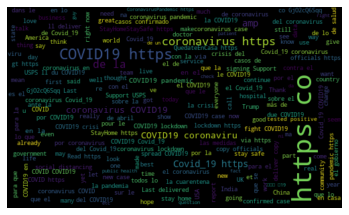

In [78]:
allwords = ''.join( [twts for twts in df['text']])
wordcloud = WordCloud(width = 500,height = 300,random_state = 20,max_font_size=40).generate(allwords)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [80]:
print(df['text'],df['subjectivity'],df['polarity'])

0         Para complementar la higiene de tus manos, el ...
1         PWDs from Tahanang Walang Hagdan get aid amid ...
2         France ได้รับความทุกข์ทรมานจาก  ชุดการแยกตัวที...
3         Target ng Department of Health na magkaroon ng...
4         La _mx lanzó una nueva convocatoria especial p...
                                ...                        
544730    ⚠️ 4 nouvelles villes placées en quarantaine a...
544731    Los TEDAX de la  colaboran en el diseño de un ...
544732    🔴🗣 Coronavirus: El consultorio del Dr. Chigane...
544733    As our national government is working to respo...
544734    So, I figured if you have to wear a mask, it m...
Name: text, Length: 544735, dtype: object 0         0.00
1         0.00
2         0.00
3         0.00
4         0.30
          ... 
544730    0.00
544731    0.00
544732    0.00
544733    0.25
544734    0.00
Name: subjectivity, Length: 544735, dtype: float64 0         0.00
1         0.00
2         0.00
3         0.00
4         0.00
       